# Medical Cost Presonal Insurance
## Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .
Columns                                            
•	age: age of primary beneficiary
•	sex: insurance contractor gender, female, male
•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
•	children: Number of children covered by health insurance / Number of dependents
•	smoker: Smoking
•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
•	charges: Individual medical costs billed by health insurance

Predict : Can you accurately predict insurance costs?

Dataset Link-
https://github.com/dsrscientist/dataset4
https://github.com/dsrscientist/dataset4/blob/main/medical_cost_insurance.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline

from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import joblib

import warnings
warnings.filterwarnings('ignore')

In [2]:
df =pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB










here 3 data type sex, smoker and region is an object type of data.

In [6]:
# lets check the null values are present in the data set or not
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.isnull().sum().sum()

0

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010




here we can observe that in age,bmi and children median is almost equal to mean.so there is min.positive biasness.
only in charges median is less than the mean...means it is skewed to the right.

In [9]:
# in verical
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [10]:
# lets check number of unique values present in the dataset
df.nunique().to_frame("no.of unique values")

,no.of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [11]:
df['charges'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

# Univariate analysis

male      676
female    662
Name: sex, dtype: int64


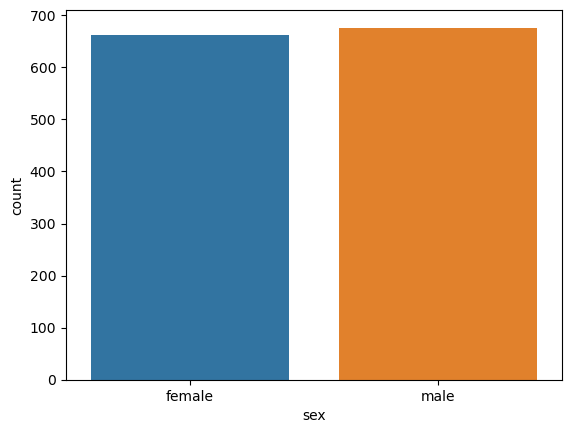

In [12]:
ax = sns.countplot(x='sex', data = df)
print(df['sex'].value_counts())

here make female is almost same. Data is not imbalance.

no     1064
yes     274
Name: smoker, dtype: int64
/n **************************************************************************************************** /n


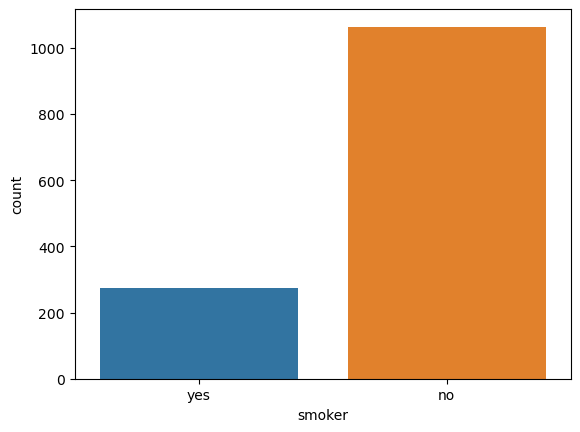

In [13]:
ax = sns.countplot(x='smoker', data = df)
print(df['smoker'].value_counts())
print('/n','*'*100,'/n')



/n **************************************************************************************************** /n


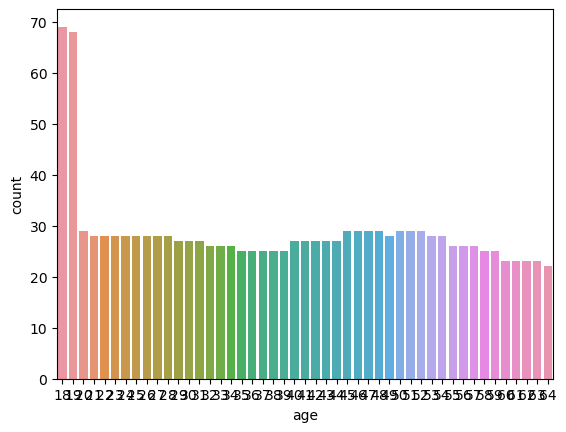

In [14]:
ax = sns.countplot(x='age', data = df)
print('/n','*'*100,'/n')



0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
/n **************************************************************************************************** /n


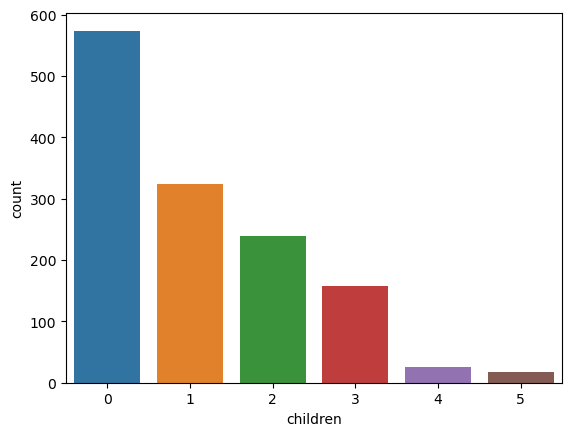

In [15]:
ax = sns.countplot(x='children', data = df)
print(df['children'].value_counts())
print('/n','*'*100,'/n')



32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64
/n **************************************************************************************************** /n


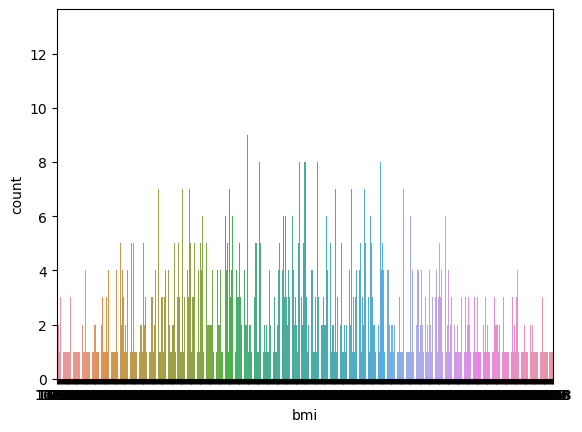

In [16]:
ax = sns.countplot(x='bmi', data = df)
print(df['bmi'].value_counts())
print('/n','*'*100,'/n')



southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
/n **************************************************************************************************** /n


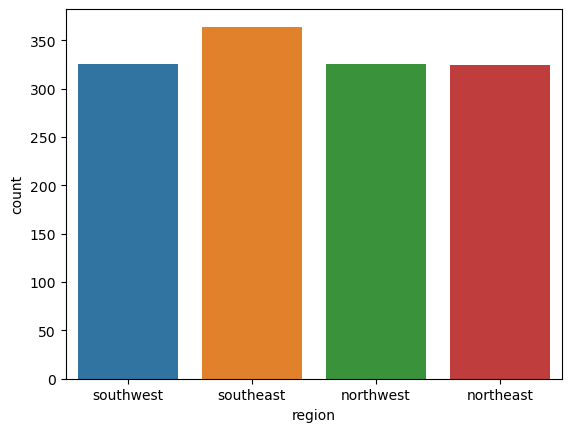

In [17]:
ax = sns.countplot(x='region', data = df)
print(df['region'].value_counts())
print('/n','*'*100,'/n')

southwest has the more count than the other region.

# Bi variate analysis

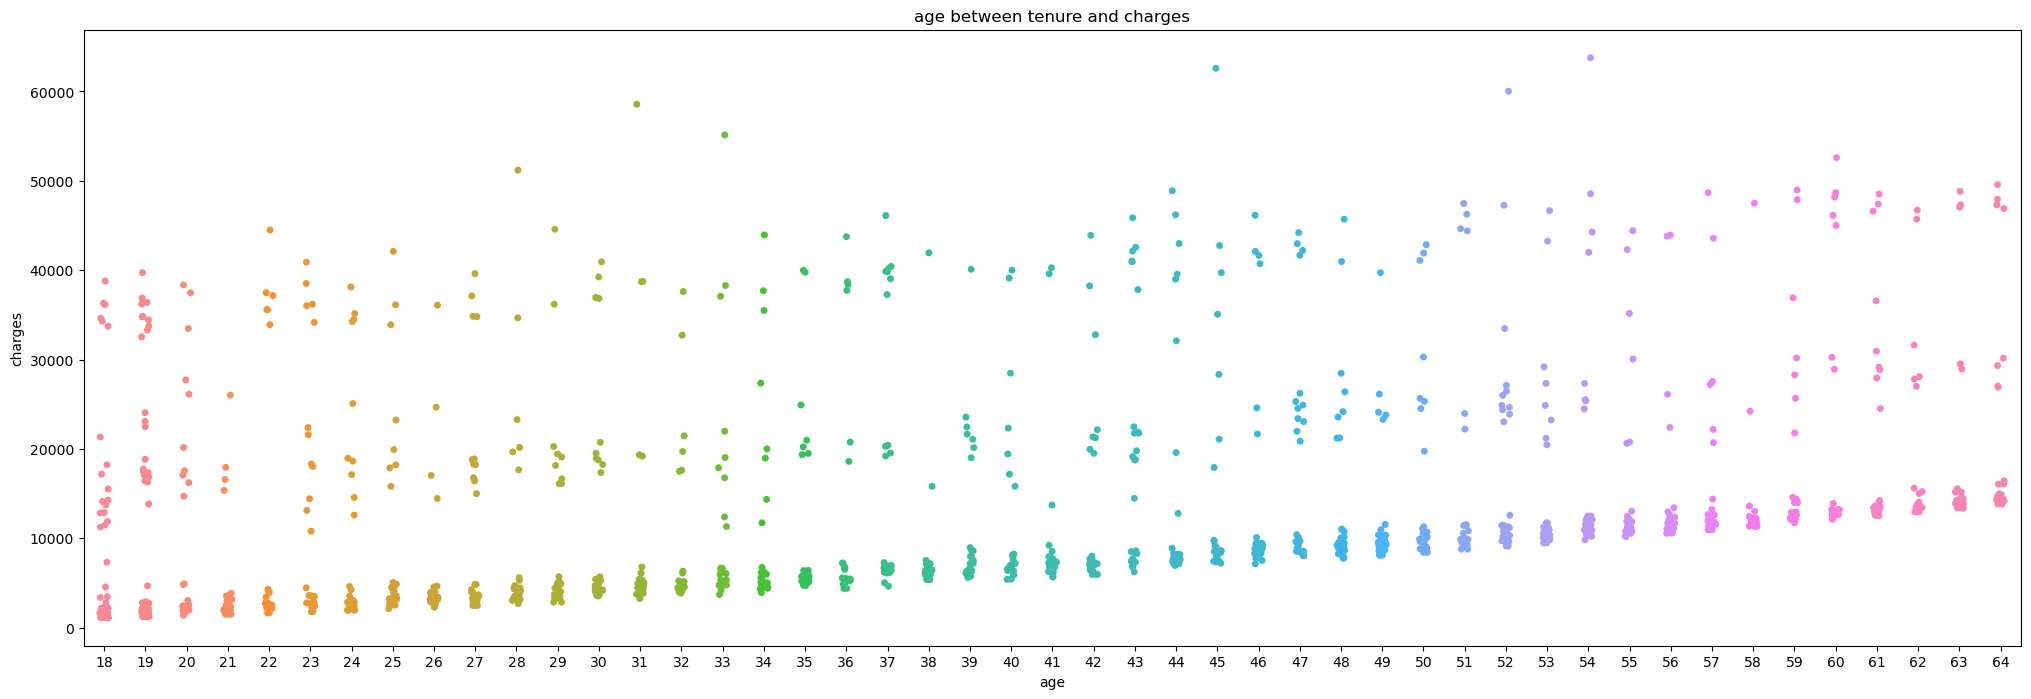

In [18]:
plt.figure(figsize=(25,8))
sns.stripplot(x="age", y = "charges", data= df)
plt.title('age between tenure and charges')
plt.show()

in this graph, we notice that as per age medical charges is also inceases.

<AxesSubplot:title={'center':'Age vs Charge'}, xlabel='age', ylabel='charges'>

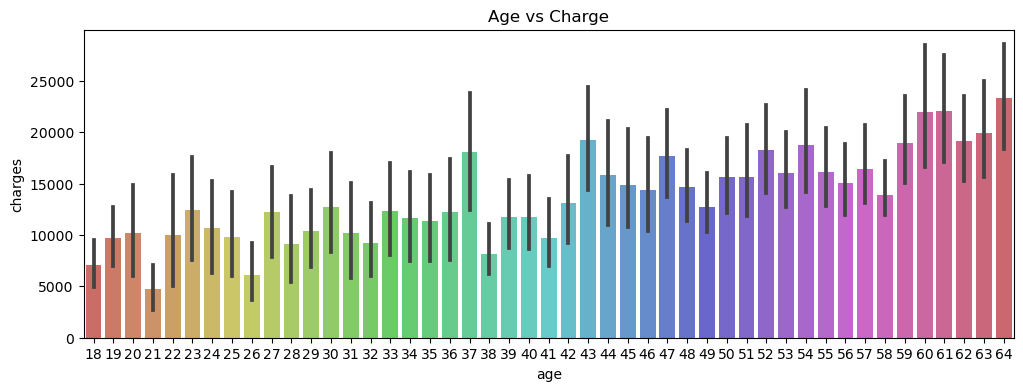

In [19]:
# lets chaek another graph for the same.
plt.figure(figsize=(12,4))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=df,palette= "hls")


we can observe charges is increses as age is incereses.


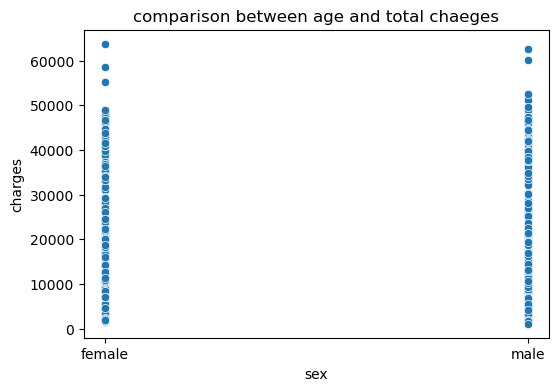

In [20]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='sex', y = "charges", data=df)
plt.title("comparison between age and total chaeges")
plt.show()

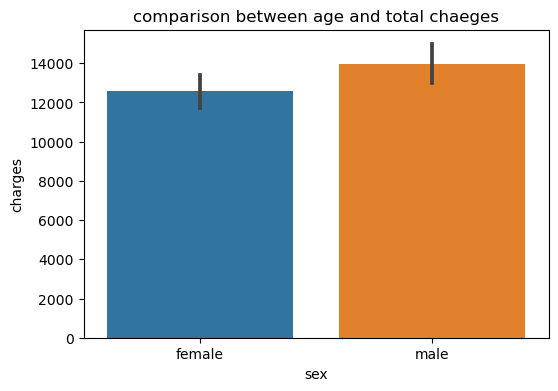

In [21]:
plt.figure(figsize=(6,4))
sns.barplot(x='sex', y = "charges", data=df)
plt.title("comparison between age and total chaeges")
plt.show()

male is having slightly high charges coampred to female.

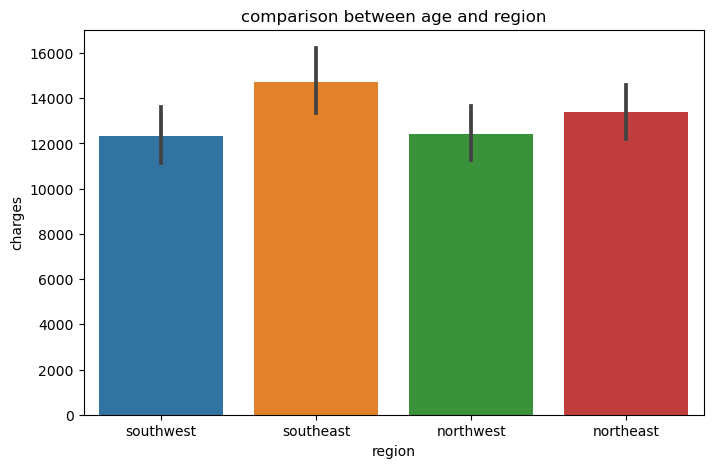

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(x='region', y = "charges", data=df)
plt.title("comparison between age and region")
plt.show()

as we notice as per the count in the southeast rigion have also charges is  high as coampred to other region

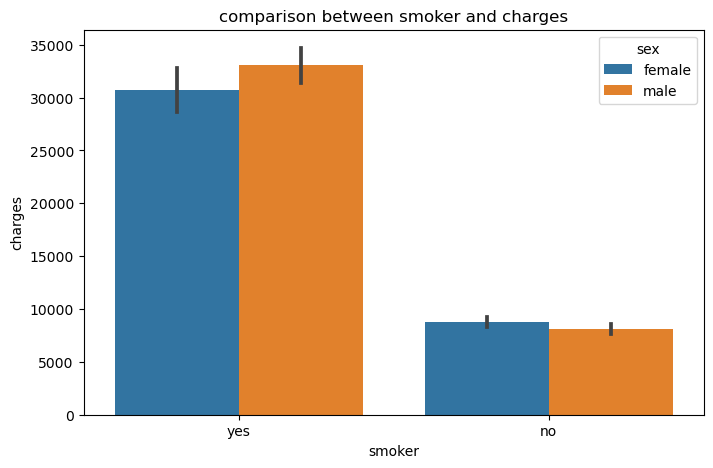

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(x='smoker', y = "charges", data=df,hue = 'sex')
plt.title("comparison between smoker and charges")
plt.show()

the pepole who smoke has higher charges as the persons who dont smoke.

<AxesSubplot:xlabel='charges', ylabel='Count'>

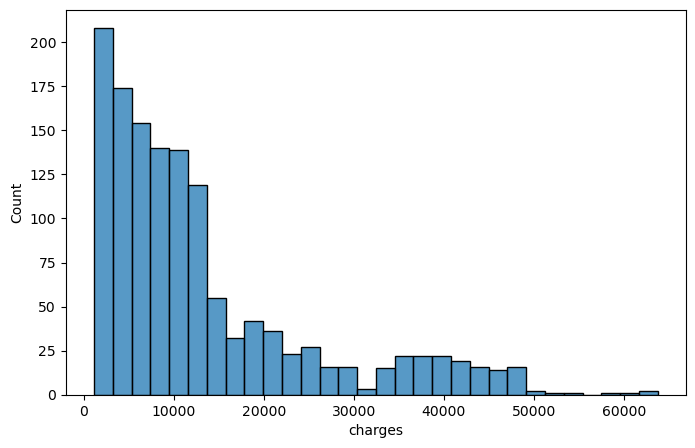

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(x=df["charges"])

we observed that here charges are more commonly is between 10000 to 25000.

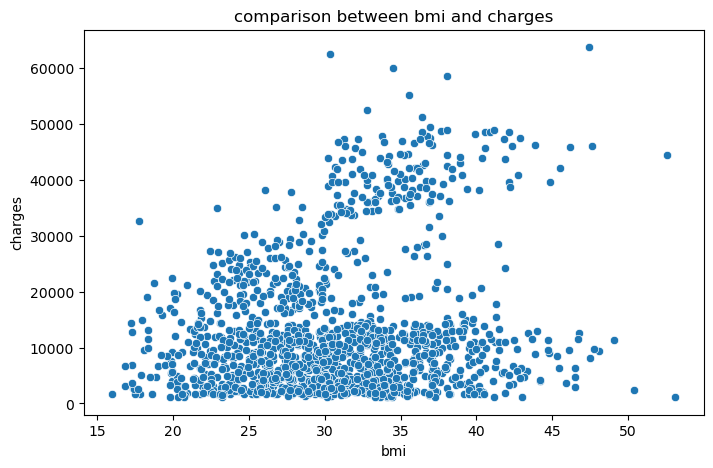

In [25]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='bmi', y = "charges", data=df)
plt.title("comparison between bmi and charges")
plt.show()

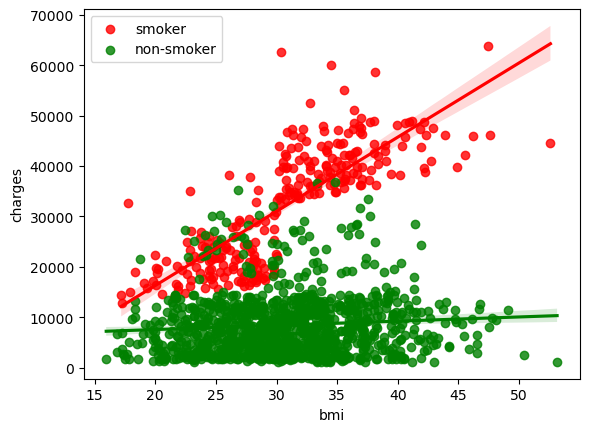

In [26]:
sns.regplot(x=df["bmi"][df["smoker"] == "yes"], y=df["charges"][df["smoker"] == "yes"], color="red", label="smoker")
sns.regplot(x=df["bmi"][df["smoker"] == "no"], y=df["charges"][df["smoker"] == "no"], color="green", label="non-smoker")
plt.legend()

the person who smoke has high bmi and it cause to increse the charges

Male 50.52% | Female 49.48%

159 of 676 (23.52%) men smoke.
115 of 662 (17.37%) women smoke.


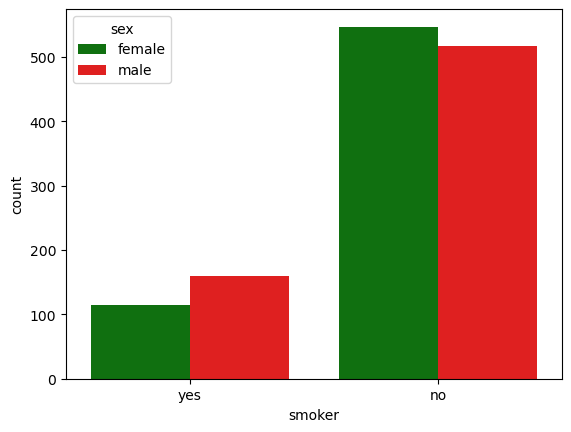

In [27]:
sns.countplot(x="smoker", data =df, hue="sex", palette=["green", "red"])
males = df[df.sex == "male"].shape[0]
females = df[df.sex == "female"].shape[0]

male_smokers = df[(df.sex == "male") & (df.smoker == "yes")].shape[0]
female_smokers = df[(df.sex == "female") & (df.smoker == "yes")].shape[0]

print("Male {:.2f}% | Female {:.2f}%".format(100*males/(males+females), 100*females/(males+females)))
print("\n{} of {} ({:.2f}%) men smoke.".format(male_smokers, males, 100*male_smokers/males))
print("{} of {} ({:.2f}%) women smoke.".format(female_smokers, females, 100*female_smokers/females))

male smoke 23% as comapred to womens 17%

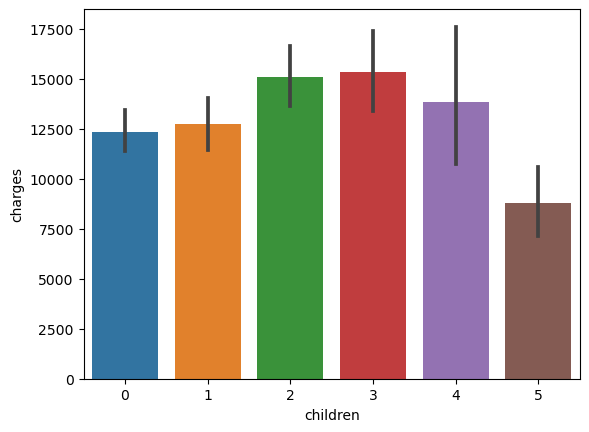

In [28]:
sns.barplot(x='children', y='charges', data = df)
plt.show()

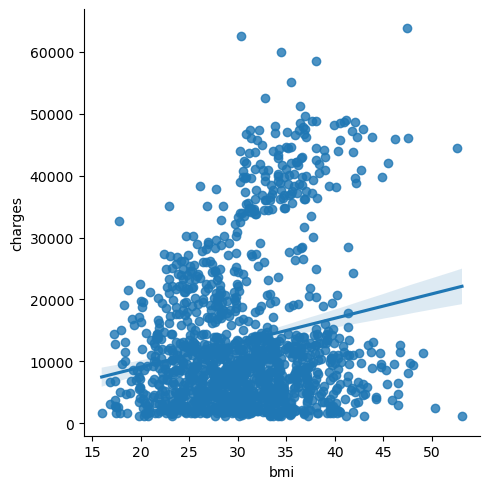

In [29]:
sns.lmplot(x='bmi', y='charges', data = df, palette= "Spectral")
plt.show()

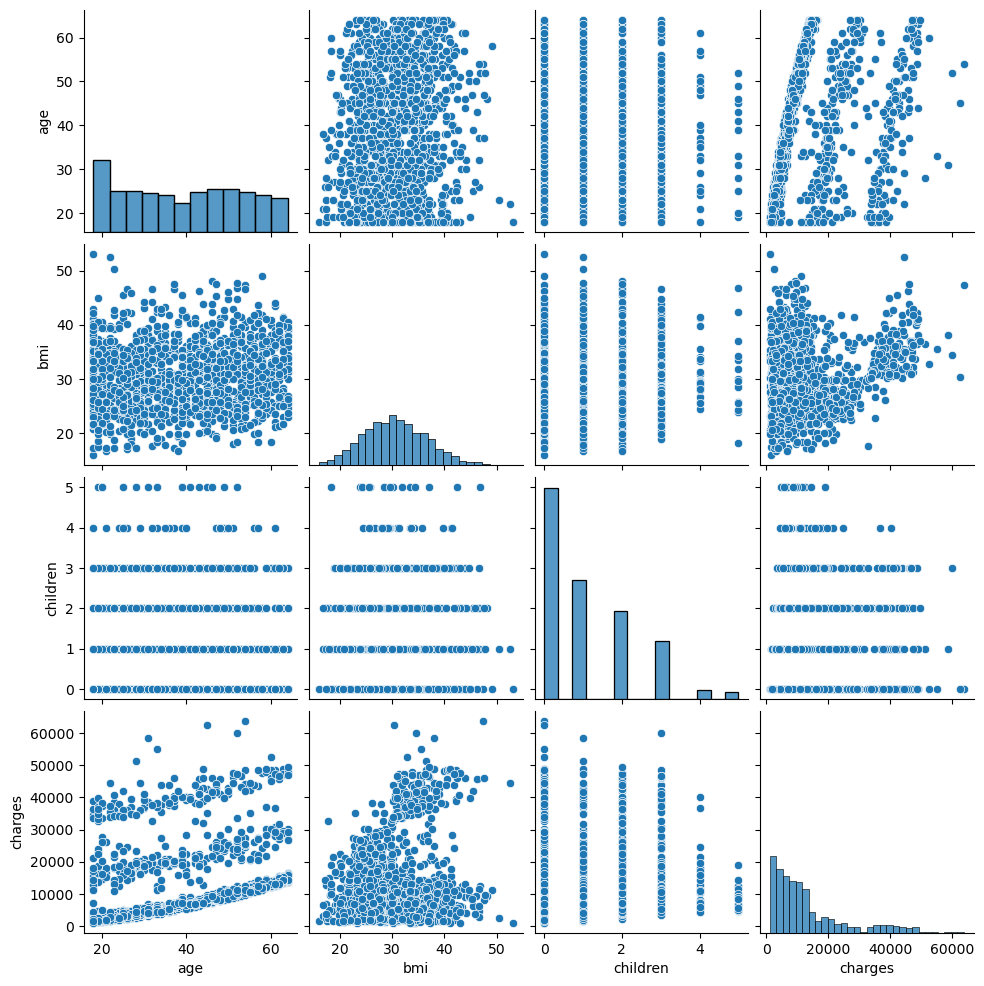

In [30]:
sns.pairplot(data=df,palette = 'RdYiGn')
plt.show()

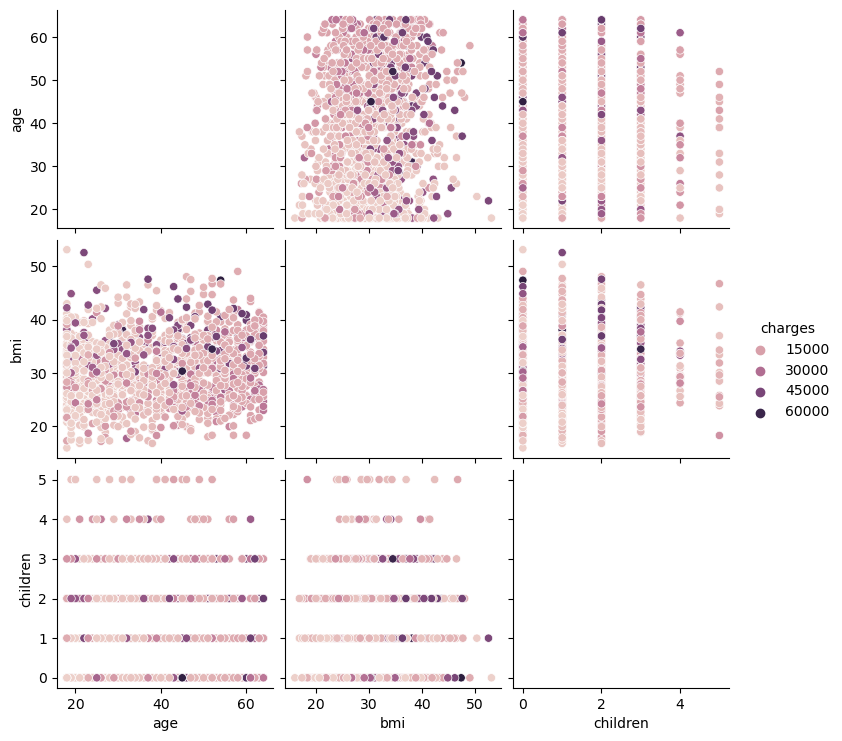

In [31]:
sns.pairplot(df,hue = 'charges')
plt.show()

# seperate the object dataframe.

In [32]:
cate_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        cate_col.append(i)
cate_col 

num_col = []
for i in df.dtypes.index :
    if df.dtypes[i] != 'object':
        num_col.append(i)
        
num_col

['age', 'bmi', 'children', 'charges']

In [33]:
cate_col

['sex', 'smoker', 'region']

In [34]:
 # we have  some object data lets convert in into in object

In [35]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes =='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1 ))

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   float64
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   float64
 5   region    1338 non-null   float64
 6   charges   1338 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.3 KB


In [37]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520


In [38]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


# check outliers by using box plot

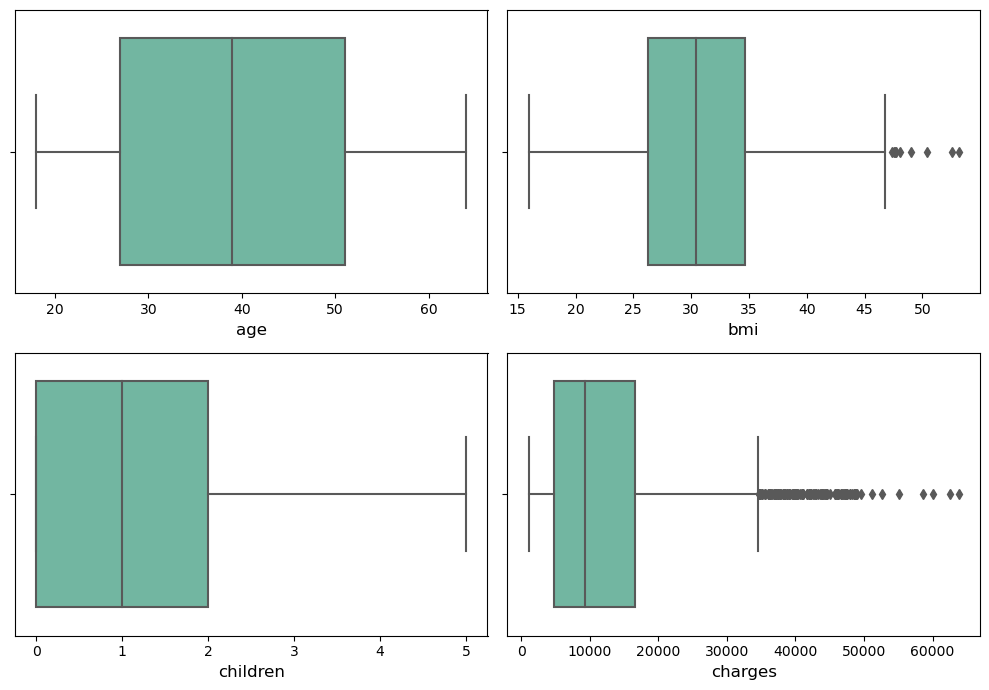

In [39]:
plt.figure(figsize= (10,7), facecolor = 'white')
plotnumber = 1
for col in num_col:
    if plotnumber<=4:
        ax= plt.subplot(2,2, plotnumber)
        sns.boxplot(df[col], palette="Set2")
        plt.xlabel(col, fontsize =12)
        
    plotnumber +=1
plt.tight_layout()

we observe here only charges nad the bmi has the outliers.

In [40]:
# lets remove the outliers

In [41]:
from scipy.stats import zscore
out_features = df[['bmi', 'charges']]
z= np.abs(zscore(out_features)) 

zscore thrshold value is -3 to 3

In [42]:
np.where(z>3)

(array([  34,  116,  543,  577,  819,  847, 1047, 1146, 1230, 1300, 1317],
       dtype=int64),
 array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0], dtype=int64))

In [43]:
df1= df[(z<3).all(axis= 1)]
df1.shape

(1327, 7)

In [44]:
z.iloc[116,0]

3.0178611981425605

In [45]:
print('Old DataFrame--', df.shape[0])
print('New DataFrame--', df1.shape[0])

Old DataFrame-- 1338
New DataFrame-- 1327


In [46]:
print('Data Loss percentage---', ((df.shape[0]-df1.shape[0])/df.shape[0]*100))

Data Loss percentage--- 0.8221225710014948


IQR method features only

In [47]:
Q1 = out_features.quantile(0.25)
Q3 = out_features.quantile(0.75)
IQR = Q3-Q1
df2 = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [48]:
df2.shape

(1193, 7)

In [49]:
print('Old DataFrame--', df.shape[0])
print('New DataFrame--', df2.shape[0])

Old DataFrame-- 1338
New DataFrame-- 1193


In [50]:
print('Data Loss percentage---', ((df.shape[0]-df2.shape[0])/df.shape[0]*100))

Data Loss percentage--- 10.837070254110612


data loss is very high as compare to the total data.

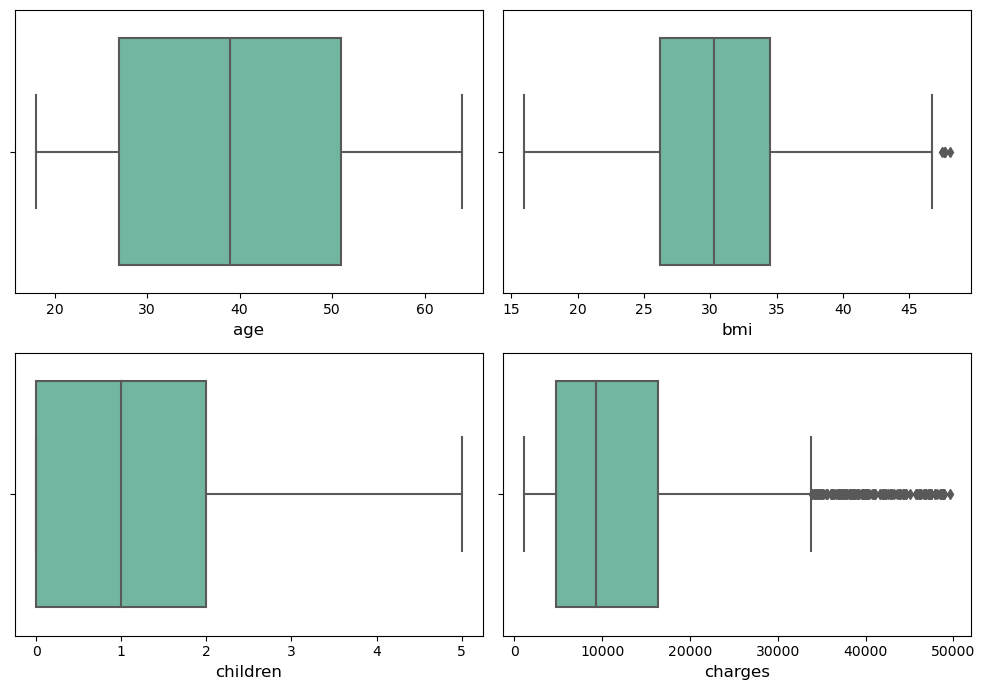

In [51]:
plt.figure(figsize= (10,7), facecolor = 'white')
plotnumber = 1
for col in num_col:
    if plotnumber<=4:
        ax= plt.subplot(2,2, plotnumber)
        sns.boxplot(df1[col], palette="Set2")
        plt.xlabel(col, fontsize =12)
        
    plotnumber +=1
plt.tight_layout()

# Distribution plot

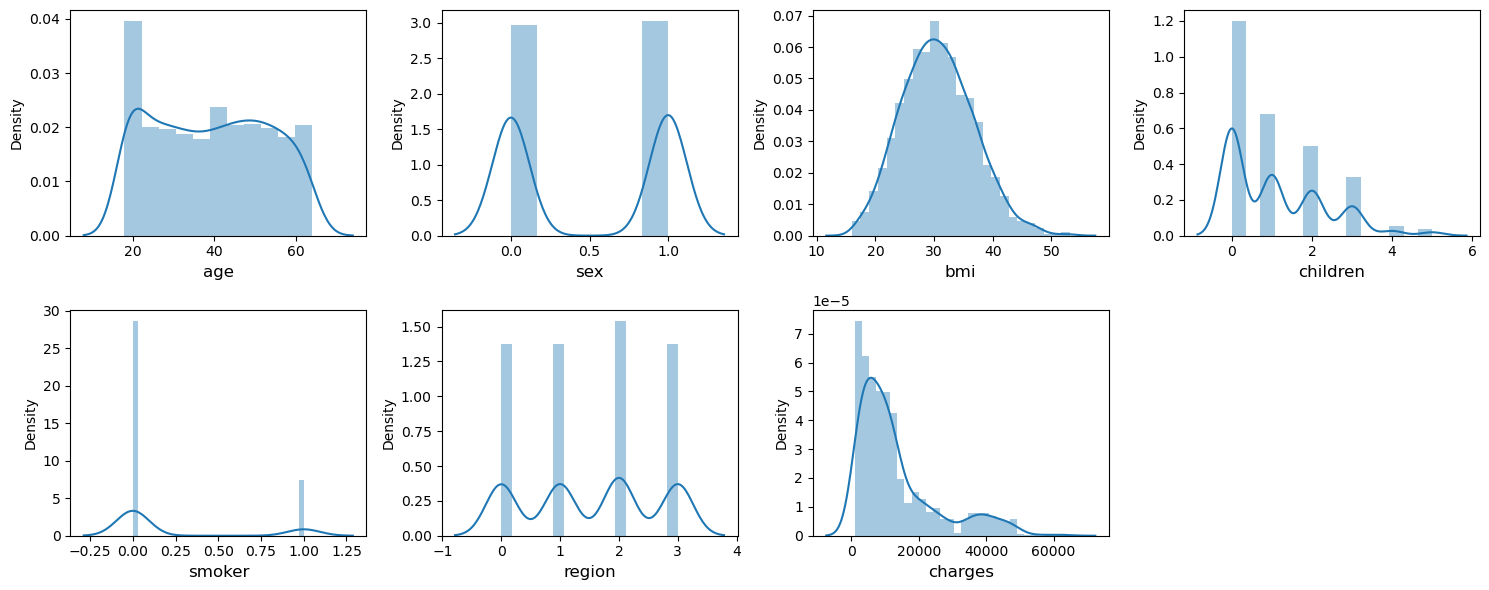

In [52]:
plt.figure(figsize= (15,6), facecolor = 'white')
plotnumber = 1
for col in df :
    if plotnumber<=8:
        ax= plt.subplot(2,4, plotnumber)
        sns.distplot([df[col]])
        plt.xlabel(col, fontsize =12)
        plt.yticks(rotation = 0, fontsize = 10)
        
    plotnumber +=1
plt.tight_layout()

sex,smoker is bianry, region has only four category.
age and charges have skewness.

In [53]:
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

skewness range genrally we consider as  -0.5 to +0.5

In [54]:
df["charges"] = np.cbrt(df["charges"])

In [55]:
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     0.515183
dtype: float64

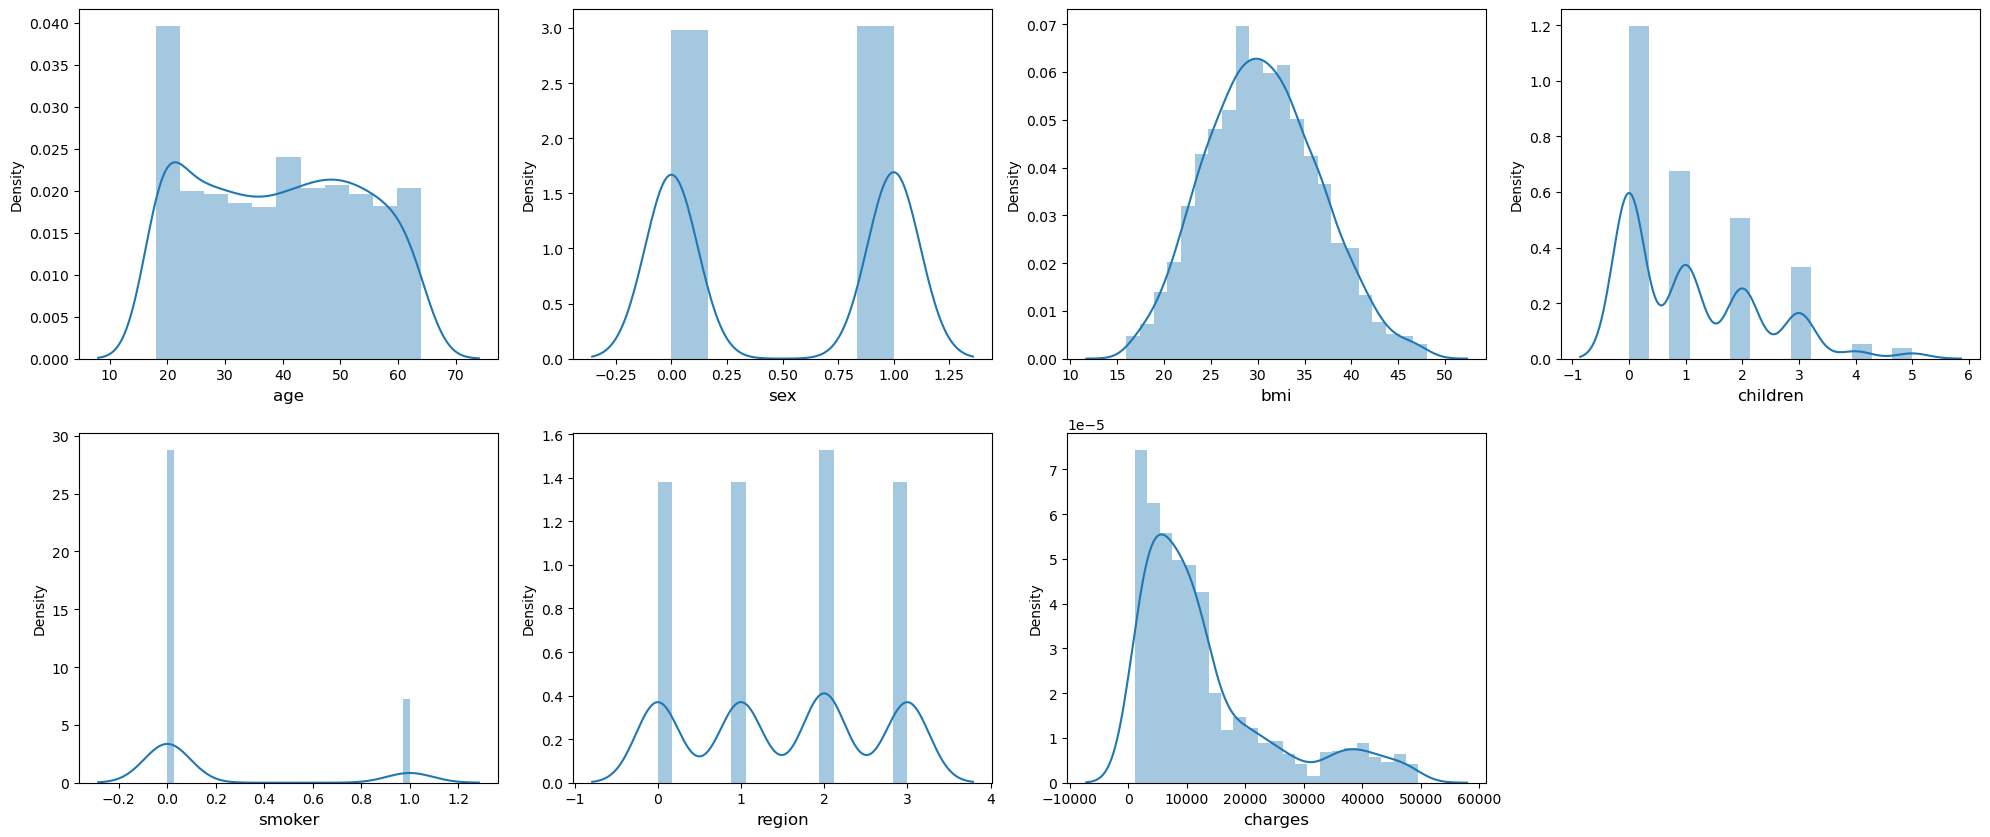

In [56]:
plt.figure(figsize= (20,25), facecolor = 'white')
plotnumber = 1
for col in df1:
    if plotnumber<=20:
        ax= plt.subplot(6,4, plotnumber)
        sns.distplot([df1[col]])
        plt.xlabel(col, fontsize =12)
        plt.yticks(rotation = 0, fontsize = 10)
        
    plotnumber +=1
plt.tight_layout()

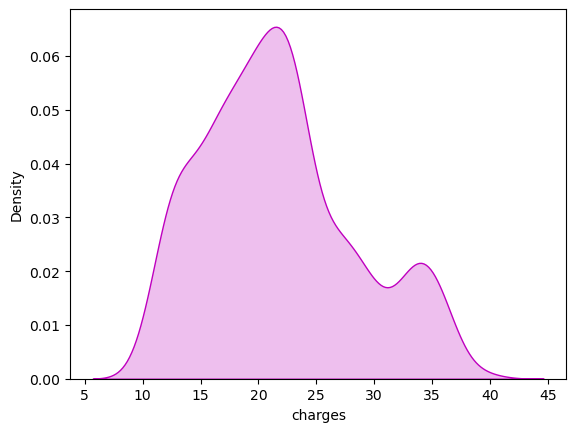

In [57]:
sns.distplot(df['charges'], color = 'm', kde_kws = {'shade':True}, hist= False)
plt.show()

In [58]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.451354
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.027560
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.156375
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.123941
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.732564
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.029807
charges,0.451354,0.027560,0.156375,0.123941,0.732564,-0.029807,1.000000


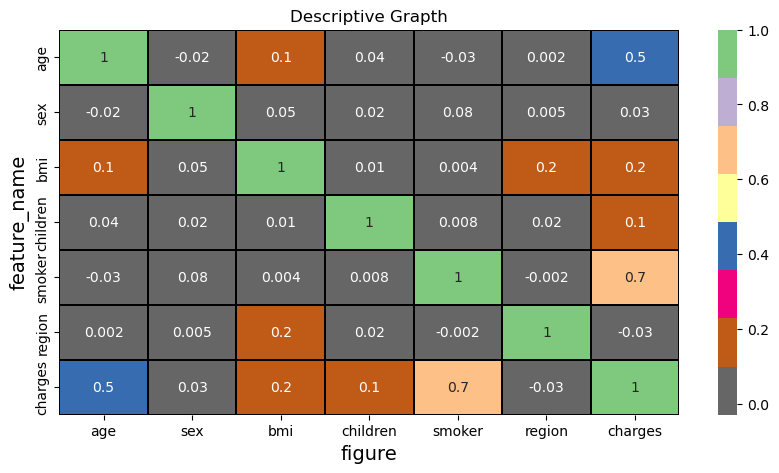

In [59]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), linewidths =0.1,fmt= '0.1g', linecolor = 'black',annot = True, cmap = 'Accent_r')
plt.xlabel('figure',fontsize = 14)
plt.ylabel('feature_name', fontsize= 14)
plt.title('Descriptive Grapth')
plt.show()

age and smoker and bmi highly corelatrd with charges,

In [60]:
df.corr().charges.sort_values()

region     -0.029807
sex         0.027560
children    0.123941
bmi         0.156375
age         0.451354
smoker      0.732564
charges     1.000000
Name: charges, dtype: float64

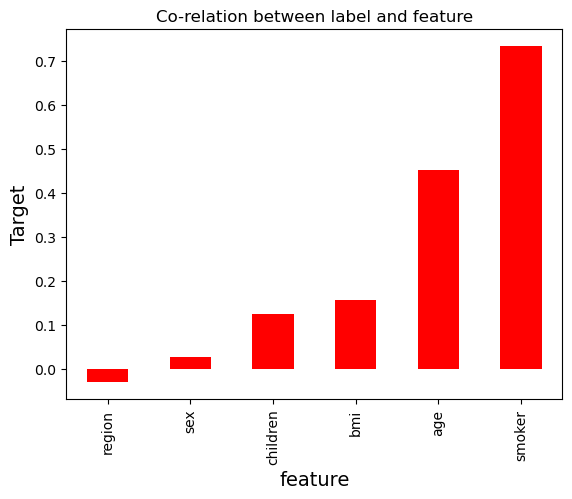

In [61]:
df.corr()['charges'].sort_values(ascending = True).drop(['charges']).plot(kind = "bar", color = 'r')
plt.xlabel('feature',fontsize = 14)
plt.ylabel('Target', fontsize= 14)
plt.title('Co-relation between label and feature')
plt.show()

# seperating the independant and target varaible into X and Y

In [63]:
x =df1.drop("charges",axis =1)
y = df1["charges"]
print('feature dia = ', x.shape)
print('label dia = ', y.shape)

feature dia =  (1327, 6)
label dia =  (1327,)


In [64]:
# feature scaling using standard scalurization

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.439902,-1.006805,-0.446000,-0.910565,1.997178,1.344197
1,-1.511141,0.993241,0.534254,-0.081813,-0.500706,0.440117
2,-0.798759,0.993241,0.405668,1.575689,-0.500706,0.440117
3,-0.442568,0.993241,-1.313533,-0.910565,-0.500706,-0.463963
4,-0.513806,0.993241,-0.282346,-0.910565,-0.500706,-0.463963
...,...,...,...,...,...,...
1322,0.768481,0.993241,0.066671,1.575689,-0.500706,-0.463963
1323,-1.511141,-1.006805,0.225315,-0.910565,-0.500706,-1.368042
1324,-1.511141,-1.006805,1.048595,-0.910565,-0.500706,0.440117
1325,-1.297426,-1.006805,-0.796687,-0.910565,-0.500706,1.344197


we have scaled the data by using StandardScaler to overcome the issue of biasness

In [66]:
#To check multi co-linearity

<AxesSubplot:xlabel='charges'>

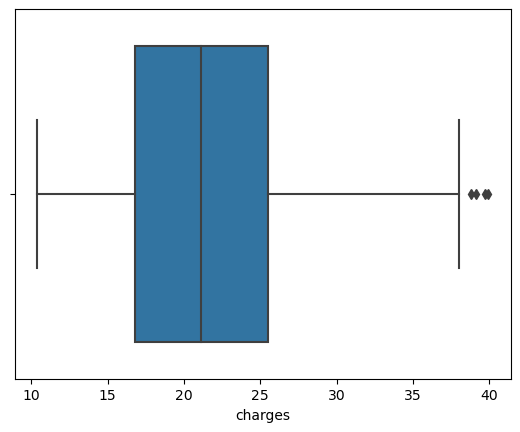

In [67]:
sns.boxplot(x=df["charges"])

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

In [69]:
vif =  pd.DataFrame()
vif["vif values"] = [variance_inflation_factor(x.values,i)
                   for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,vif values,Features
0,1.017498,age
1,1.008283,sex
2,1.041989,bmi
3,1.002811,children
4,1.006607,smoker
5,1.025755,region


if value 1 -> it s not correalted with the remaining coloumn if value 12--> it is 12 times
corelated with remiaing features. when there was no coliinerarity here vif threshold value is 5 
but sometimes it is considered as 10 lets remove the feature which have high threshold value.



But all the features have in threhold limit.

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
MaxAccu = 0
maxRS = 0
for i in range(1,450):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = i)
    
LR = LinearRegression()
LR.fit(x_train,y_train)
pred = LR.predict(x_test)
acc = r2_score(y_test,pred)

if acc>MaxAccu:
    MaxAccu = acc
    maxRS = i
    
print("Best r2 is", MaxAccu, "at random state", maxRS)

Best r2 is 0.7505473427866497 at random state 449


# creating train test split

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = maxRS)

In [72]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [73]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)

print('r2_score:', r2_score(y_test, pred_LR))
print('r2_Score on training data:', r2_score(y_train, pred_train)*100)
print('mean absolute error:-', mean_absolute_error(y_test, pred_LR))
print('mean square error:-', mean_squared_error(y_test, pred_LR))
print('root mean square error:-', np.sqrt(mean_squared_error(y_test, pred_LR)))

r2_score: 0.7505473427866497
r2_Score on training data: 75.33239452144412
mean absolute error:- 4163.5474538375665
mean square error:- 35493350.46546349
root mean square error:- 5957.62960123097


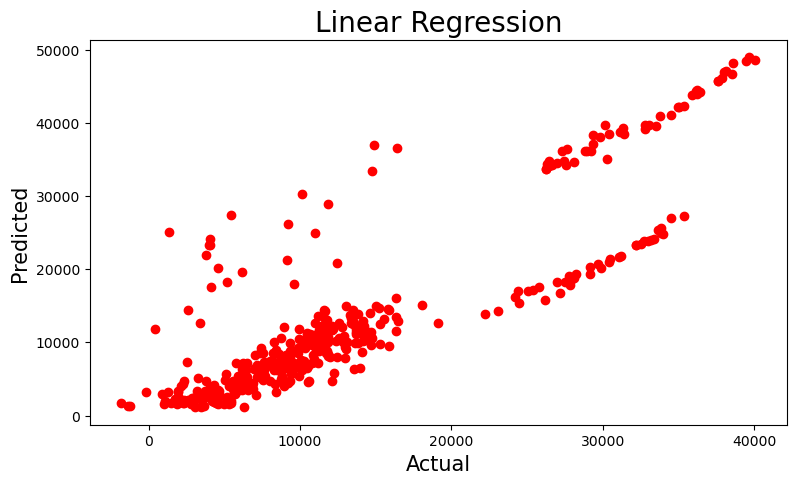

In [74]:
plt.figure(figsize=(9,5))
plt.scatter(x=pred_LR, y=y_test, color = 'r')
plt.xlabel('Actual', fontsize = 15)
plt.ylabel('Predicted',fontsize = 15)
plt.title('Linear Regression', fontsize = 20)
plt.show()

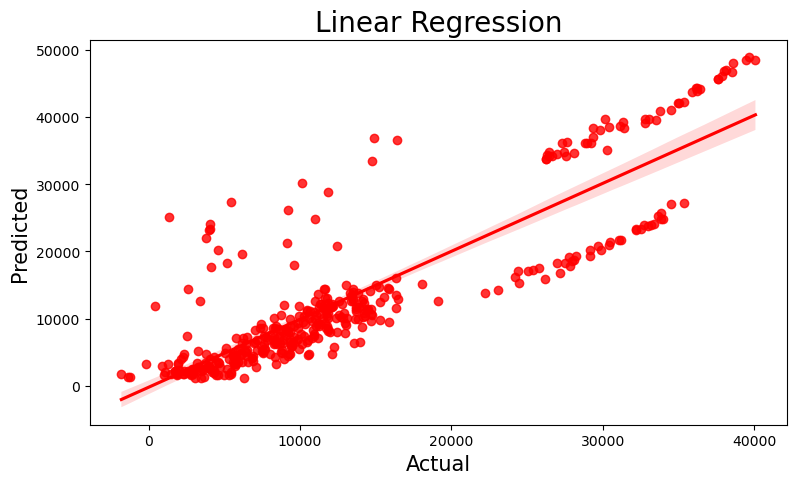

In [75]:
plt.figure(figsize=(9,5))
sns.regplot(x=pred_LR, y=y_test, color = 'r')
plt.xlabel('Actual', fontsize = 15)
plt.ylabel('Predicted',fontsize = 15)
plt.title('Linear Regression', fontsize = 20)
plt.show()

In [76]:
print('Random Forest Regressor')
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_train)

print('r2_score:', r2_score(y_test, pred_RFR))
print('r2_Score on training data:', r2_score(y_train, pred_train)*100)
print('mean absolute error:-', mean_absolute_error(y_test, pred_RFR))
print('mean square error:-', mean_squared_error(y_test, pred_RFR))
print('root mean square error:-', np.sqrt(mean_squared_error(y_test, pred_RFR)))
print('\n','*'*100,'\n')

print('Extra Trees Regressor')
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr = etr.predict(x_test)
pred_train = etr.predict(x_train)

print('r2_score:', r2_score(y_test, pred_etr))
print('r2_Score on training data:', r2_score(y_train, pred_train)*100)
print('mean absolute error:-', mean_absolute_error(y_test, pred_etr))
print('mean square error:-', mean_squared_error(y_test, pred_etr))
print('root mean square error:-', np.sqrt(mean_squared_error(y_test, pred_etr)))
print('\n','*'*100,'\n')

print('Decision Tree Regressor')
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_DTR = DTR.predict(x_test)
pred_train = DTR.predict(x_train)

print('r2_score:', r2_score(y_test, pred_DTR))
print('r2_Score on training data:', r2_score(y_train, pred_train)*100)
print('mean absolute error:-', mean_absolute_error(y_test, pred_DTR))
print('mean square error:-', mean_squared_error(y_test, pred_DTR))
print('root mean square error:-', np.sqrt(mean_squared_error(y_test, pred_DTR)))
print('\n','*'*100,'\n')

print('Gradient Boosting Regressor')
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr = gbr.predict(x_test)
pred_train = etr.predict(x_train)

print('r2_score:', r2_score(y_test, pred_gbr))
print('r2_Score on training data:', r2_score(y_train, pred_train)*100)
print('mean absolute error:-', mean_absolute_error(y_test, pred_gbr))
print('mean square error:-', mean_squared_error(y_test, pred_gbr))
print('root mean square error:-', np.sqrt(mean_squared_error(y_test, pred_gbr)))
print('\n','*'*100,'\n')

print('Bagging Regressor')
br = BaggingRegressor()
br.fit(x_train,y_train)
pred_br = br.predict(x_test)
pred_train = DTR.predict(x_train)

print('r2_score:', r2_score(y_test, pred_br))
print('r2_Score on training data:', r2_score(y_train, pred_train)*100)
print('mean absolute error:-', mean_absolute_error(y_test, pred_br))
print('mean square error:-', mean_squared_error(y_test, pred_br))
print('root mean square error:-', np.sqrt(mean_squared_error(y_test, pred_br)))
print('\n','*'*100,'\n')

print('SVR')
svr = SVR()
svr.fit(x_train,y_train)
pred_svr = svr.predict(x_test)
pred_train = svr.predict(x_train)

print('r2_score:', r2_score(y_test, pred_svr))
print('r2_Score on training data:', r2_score(y_train, pred_train)*100)
print('mean absolute error:-', mean_absolute_error(y_test, pred_svr))
print('mean square error:-', mean_squared_error(y_test, pred_svr))
print('root mean square error:-', np.sqrt(mean_squared_error(y_test, pred_svr)))
print('\n','*'*100,'\n')


print('KNeighbors Regressor')
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)

print('r2_score:', r2_score(y_test, pred_knn))
print('r2_Score on training data:', r2_score(y_train, pred_train)*100)
print('mean absolute error:-', mean_absolute_error(y_test, pred_knn))
print('mean square error:-', mean_squared_error(y_test, pred_knn))
print('root mean square error:-', np.sqrt(mean_squared_error(y_test, pred_knn)))
print('\n','*'*100,'\n')

Random Forest Regressor
r2_score: 0.8492349887884674
r2_Score on training data: 97.37812474094675
mean absolute error:- 2532.683605452277
mean square error:- 21451587.009088293
root mean square error:- 4631.585798523902

 **************************************************************************************************** 

Extra Trees Regressor
r2_score: 0.8305299465130903
r2_Score on training data: 99.78920956560829
mean absolute error:- 2527.7233665992485
mean square error:- 24113032.384606775
root mean square error:- 4910.502253803248

 **************************************************************************************************** 

Decision Tree Regressor
r2_score: 0.6905022891759173
r2_Score on training data: 99.78920956560829
mean absolute error:- 3104.3365521528826
mean square error:- 44036855.895836644
root mean square error:- 6636.027116870202

 **************************************************************************************************** 

Gradient Boosting Regress

# Cross validation

In [77]:
from sklearn.model_selection import cross_val_score

import joblib

import warnings
warnings.filterwarnings('ignore')

In [78]:
score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("difference between r2score and cross validation score is---", (r2_score(y_test, pred_LR)-score.mean())*100)

[0.765011   0.70933774 0.77920306 0.73356217 0.76317173]
0.7500571387979417
difference between r2score and cross validation score is--- 0.04902039887080267


In [79]:
print("random forest cv ")
score = cross_val_score(RFR,x,y)
print(score)
print(score.mean())
print("difference between r2score and cross validation score is---", (r2_score(y_test, pred_RFR)-score.mean())*100)
print('\n','*'*100,'\n')

print("extra tree reg cv ")
score = cross_val_score(etr,x,y)
print(score)
print(score.mean())
print("difference between r2score and cross validation score is---", (r2_score(y_test, pred_etr)-score.mean())*100)
print('\n','*'*100,'\n')

print("Decision tree regressor cv ")
score = cross_val_score(DTR,x,y)
print(score)
print(score.mean())
print("difference between r2score and cross validation score is---", (r2_score(y_test, pred_DTR)-score.mean())*100)
print('\n','*'*100,'\n')

print("Gradient Boost cv ")
score = cross_val_score(gbr,x,y)
print(score)
print(score.mean())
print("difference between r2score and cross validation score is---", (r2_score(y_test, pred_gbr)-score.mean())*100)
print('\n','*'*100,'\n')

print("BR cv ")
score = cross_val_score(br,x,y)
print(score)
print(score.mean())
print("difference between r2score and cross validation score is---", (r2_score(y_test, pred_br)-score.mean())*100)
print('\n','*'*100,'\n')

print(" SVR cv ")
score = cross_val_score(svr,x,y)
print(score)
print(score.mean())
print("difference between r2score and cross validation score is---", (r2_score(y_test, pred_svr)-score.mean())*100)
print('\n','*'*100,'\n')

print("KNN cv ")
score = cross_val_score(knn,x,y)
print(score)
print(score.mean())
print("difference between r2score and cross validation score is---", (r2_score(y_test, pred_knn)-score.mean())*100)
print('\n','*'*100,'\n')

random forest cv 
[0.85220944 0.77966478 0.86211455 0.83068706 0.8554996 ]
0.8360350864604909
difference between r2score and cross validation score is--- 1.319990232797652

 **************************************************************************************************** 

extra tree reg cv 
[0.83318422 0.75110773 0.84094511 0.81452248 0.8428852 ]
0.8165289470068318
difference between r2score and cross validation score is--- 1.400099950625855

 **************************************************************************************************** 

Decision tree regressor cv 
[0.74485268 0.6764339  0.69018151 0.71735836 0.67108366]
0.6999820192749042
difference between r2score and cross validation score is--- -0.9479730098986949

 **************************************************************************************************** 

Gradient Boost cv 
[0.87781153 0.79810911 0.88866687 0.84883593 0.86399245]
0.8554831781233674
difference between r2score and cross validation score is--- 0

# Hyper parameter Tunning
# Regularisation

In [80]:
param = {'alpha': [1.0,0.5,0.4,2],
        'fit_intercept':[True, False],
        'positive':[False, True],
        'random_state':[1,4,10,20],
        'solver':['auto','svd','cholesky', 'isqr','sag','saga','lbfgs']
        }
gscv =GridSearchCV(Ridge(),param, cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.5, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'isqr', 'sag',
                                    'saga', 'lbfgs']})

In [81]:
gscv.best_params_

{'alpha': 2,
 'fit_intercept': True,
 'positive': False,
 'random_state': 4,
 'solver': 'saga'}

In [82]:
model =Ridge(alpha= 2, fit_intercept= True, 
             positive= False,
             random_state= 4,
             solver= 'saga')

In [83]:
model.fit(x_train,y_train)
pred = model.predict(x_test)
print('r2_score:', r2_score(y_test, pred))

print('mean absolute error:-', mean_absolute_error(y_test, pred))
print('mean square error:-', mean_squared_error(y_test, pred))
print('root mean square error:-', np.sqrt(mean_squared_error(y_test, pred)))
print('\n','*'*100,'\n')

r2_score: 0.7504676803848104
mean absolute error:- 4169.232315695553
mean square error:- 35504685.22364562
root mean square error:- 5958.580806169

 **************************************************************************************************** 



In [84]:
import pickle
file_name = 'Tesla_Stock.pkl'
pickle.dump(model,open(file_name,'wb'))

In [85]:
loaded_model = pickle.load(open('Tesla_stock.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

75.04676803848103


In [86]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]], index = ["prdicted","original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,389,390,391,392,393,394,395,396,397,398
prdicted,7436.134907,10923.783637,38078.200206,9226.85577,4681.209025,13009.894568,38523.090018,4257.55427,13536.021318,11680.656149,...,5040.095432,29071.222215,11640.713253,3182.821986,13141.829117,7000.647794,23015.668547,16314.530511,13834.894403,4211.090869
original,9193.838500,7727.253200,47055.532100,4463.20510,3392.976800,7804.160500,48173.361000,2362.22905,14001.286700,9290.139500,...,1534.304500,20234.854750,13129.603450,3353.284000,10085.846000,6414.178000,14283.459400,11566.300550,9880.068000,1981.581900
